# Hello, this is the beginning of my attempt to read this file! Enjoy :)

In [1]:
#here are all my imports
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [87]:
taxi = pd.read_csv("data/nyc_taxi_data_2014.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [88]:
taxi.head(50)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,CMT,2014-01-09 20:45:25,2014-01-09 20:52:31,1,0.7,-73.994770,40.736828,1,N,-73.982227,40.731790,CRD,6.5,0.5,0.5,1.40,0.00,8.90
1,CMT,2014-01-09 20:46:12,2014-01-09 20:55:12,1,1.4,-73.982392,40.773382,1,N,-73.960449,40.763995,CRD,8.5,0.5,0.5,1.90,0.00,11.40
2,CMT,2014-01-09 20:44:47,2014-01-09 20:59:46,2,2.3,-73.988570,40.739406,1,N,-73.986626,40.765217,CRD,11.5,0.5,0.5,1.50,0.00,14.00
3,CMT,2014-01-09 20:44:57,2014-01-09 20:51:40,1,1.7,-73.960213,40.770464,1,N,-73.979863,40.777050,CRD,7.5,0.5,0.5,1.70,0.00,10.20
4,CMT,2014-01-09 20:47:09,2014-01-09 20:53:32,1,0.9,-73.995371,40.717248,1,N,-73.984367,40.720524,CRD,6.0,0.5,0.5,1.75,0.00,8.75
5,CMT,2014-01-09 20:45:07,2014-01-09 20:51:01,1,0.9,-73.983811,40.749655,1,N,-73.989747,40.756575,CRD,6.0,0.5,0.5,1.40,0.00,8.40
6,CMT,2014-01-09 20:44:04,2014-01-09 21:05:45,1,3.6,-73.984138,40.726317,1,N,-73.962869,40.758443,CRD,16.5,0.5,0.5,5.25,0.00,22.75
7,CMT,2014-01-09 20:43:23,2014-01-09 20:52:07,1,2.1,-73.979906,40.745850,1,N,-73.959090,40.773639,CRD,9.0,0.5,0.5,2.00,0.00,12.00
8,CMT,2014-01-09 20:43:04,2014-01-09 20:54:29,1,3.4,-73.981147,40.758918,1,N,-73.942510,40.785975,CRD,12.0,0.5,0.5,2.60,0.00,15.60
9,CMT,2014-01-09 20:50:23,2014-01-09 20:58:10,1,2.3,-73.955193,40.765468,1,N,-73.979023,40.740578,CRD,9.0,0.5,0.5,1.00,0.00,11.00


In [89]:
taxi.shape

(14999999, 18)

In [5]:
##we dont need to rename any of the columns

In [6]:
taxi.dtypes

vendor_id              object
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
trip_distance         float64
pickup_longitude      float64
pickup_latitude       float64
rate_code               int64
store_and_fwd_flag     object
dropoff_longitude     float64
dropoff_latitude      float64
payment_type           object
fare_amount           float64
surcharge             float64
mta_tax               float64
tip_amount            float64
tolls_amount          float64
total_amount          float64
dtype: object

## Data QA

### Check for duplictes

In [7]:
taxi['unique_model'] = taxi.vendor_id.str.cat(
    [taxi.pickup_datetime.apply(str), taxi.dropoff_datetime.apply(str)],sep='-')

In [8]:
taxi[["vendor_id", "pickup_datetime", "dropoff_datetime", "unique_model"]].head()

,vendor_id,pickup_datetime,dropoff_datetime,unique_model
0,CMT,2014-01-09 20:45:25,2014-01-09 20:52:31,CMT-2014-01-09 20:45:25-2014-01-09 20:52:31
1,CMT,2014-01-09 20:46:12,2014-01-09 20:55:12,CMT-2014-01-09 20:46:12-2014-01-09 20:55:12
2,CMT,2014-01-09 20:44:47,2014-01-09 20:59:46,CMT-2014-01-09 20:44:47-2014-01-09 20:59:46
3,CMT,2014-01-09 20:44:57,2014-01-09 20:51:40,CMT-2014-01-09 20:44:57-2014-01-09 20:51:40
4,CMT,2014-01-09 20:47:09,2014-01-09 20:53:32,CMT-2014-01-09 20:47:09-2014-01-09 20:53:32


In [9]:
taxi.unique_model.value_counts()

VTS-2014-01-22 14:21:00-2014-01-22 14:21:00    39
VTS-2014-01-02 18:32:00-2014-01-02 18:39:00    38
VTS-2014-01-08 21:01:00-2014-01-08 21:08:00    37
VTS-2014-01-06 19:24:00-2014-01-06 19:29:00    36
VTS-2014-01-07 19:49:00-2014-01-07 19:53:00    36
VTS-2014-01-16 19:00:00-2014-01-16 19:07:00    36
VTS-2014-01-02 18:48:00-2014-01-02 18:54:00    36
VTS-2014-01-10 19:43:00-2014-01-10 19:51:00    35
VTS-2014-01-11 19:47:00-2014-01-11 19:57:00    35
VTS-2014-01-11 18:10:00-2014-01-11 18:18:00    35
VTS-2014-01-28 20:14:00-2014-01-28 20:19:00    35
VTS-2014-01-12 00:04:00-2014-01-12 00:10:00    34
VTS-2014-01-19 21:56:00-2014-01-19 22:02:00    34
VTS-2014-01-08 18:43:00-2014-01-08 18:49:00    34
VTS-2014-01-31 21:54:00-2014-01-31 22:02:00    34
VTS-2014-01-02 18:50:00-2014-01-02 18:55:00    34
VTS-2014-01-18 21:16:00-2014-01-18 21:22:00    34
VTS-2014-01-07 20:03:00-2014-01-07 20:10:00    34
VTS-2014-01-25 14:23:00-2014-01-25 14:30:00    34
VTS-2014-01-09 19:24:00-2014-01-09 19:31:00    34


In [10]:
taxi[taxi.unique_model=='VTS-2014-01-22 14:21:00-2014-01-22 14:21:00'].head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,unique_model
2060196,VTS,2014-01-22 14:21:00,2014-01-22 14:21:00,1,0.0,-73.937778,40.75825,1,NaN,-73.937762,40.75826,CSH,2.5,0.0,0.5,0.0,0.0,3.0,VTS-2014-01-22 14:21:00-2014-01-22 14:21:00
2068886,VTS,2014-01-22 14:21:00,2014-01-22 14:21:00,1,0.0,-73.937778,40.75825,1,NaN,-73.937762,40.75826,CSH,2.5,0.0,0.5,0.0,0.0,3.0,VTS-2014-01-22 14:21:00-2014-01-22 14:21:00
2092823,VTS,2014-01-22 14:21:00,2014-01-22 14:21:00,1,0.0,-73.937778,40.75825,1,NaN,-73.937762,40.75826,CSH,2.5,0.0,0.5,0.0,0.0,3.0,VTS-2014-01-22 14:21:00-2014-01-22 14:21:00
2103124,VTS,2014-01-22 14:21:00,2014-01-22 14:21:00,1,0.0,-73.937778,40.75825,1,NaN,-73.937762,40.75826,CSH,2.5,0.0,0.5,0.0,0.0,3.0,VTS-2014-01-22 14:21:00-2014-01-22 14:21:00
2106681,VTS,2014-01-22 14:21:00,2014-01-22 14:21:00,1,0.0,-73.937778,40.75825,1,NaN,-73.937762,40.75826,CSH,2.5,0.0,0.5,0.0,0.0,3.0,VTS-2014-01-22 14:21:00-2014-01-22 14:21:00


In [11]:
taxi[taxi.duplicated()].shape

(98, 19)

In [90]:
taxi = taxi.drop_duplicates()
taxi.shape

(14999901, 18)

In [13]:
del taxi['unique_model']

### Check for missing values

In [14]:
n_records = len(taxi)
def missing_values_df(df):
    for column in df:
        print("{} | {} | {}".format(
            column, len(df[df[column].isnull()]) / (1.0*n_records), df[column].dtype
        ))

missing_values_df(taxi)

vendor_id | 0.0 | object
pickup_datetime | 0.0 | object
dropoff_datetime | 0.0 | object
passenger_count | 0.0 | int64
trip_distance | 0.0 | float64
pickup_longitude | 0.0 | float64
pickup_latitude | 0.0 | float64
rate_code | 0.0 | int64
store_and_fwd_flag | 0.5090686265196017 | object
dropoff_longitude | 9.666730467087749e-06 | float64
dropoff_latitude | 9.666730467087749e-06 | float64
payment_type | 0.0 | object
fare_amount | 0.0 | float64
surcharge | 0.0 | float64
mta_tax | 0.0 | float64
tip_amount | 0.0 | float64
tolls_amount | 0.0 | float64
total_amount | 0.0 | float64


In [15]:
taxi.store_and_fwd_flag.value_counts()

N    7196241
Y     167681
Name: store_and_fwd_flag, dtype: int64

In [16]:
taxi.store_and_fwd_flag.isnull().sum()

7635979

In [91]:
del taxi['store_and_fwd_flag']

In [92]:
taxi = taxi.dropna(subset=["dropoff_longitude", "dropoff_latitude"])

taxi.shape

(14999756, 17)

### Check for outliers

In [19]:
taxi.vendor_id.value_counts()

VTS    7634795
CMT    7364961
Name: vendor_id, dtype: int64

In [20]:
taxi.passenger_count.value_counts()

1      10602609
2       2046971
5        860368
3        611903
6        589030
4        288702
0           124
208          19
9            18
7             7
8             5
Name: passenger_count, dtype: int64

In [93]:
taxi = taxi[(taxi.passenger_count > 0) & (taxi.passenger_count < 7)]

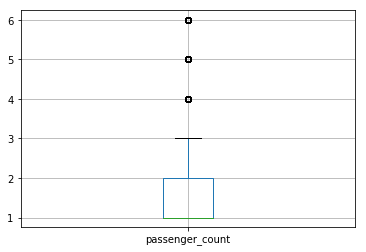

In [22]:
taxi.boxplot(column='passenger_count')

In [94]:
taxi = taxi[taxi.passenger_count < 6]

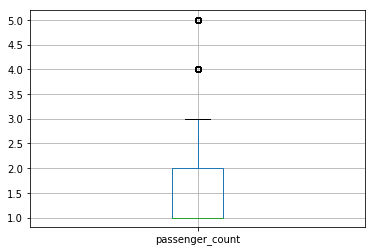

In [24]:
taxi.boxplot(column='passenger_count')

In [25]:
from scipy import stats
import numpy as np

def outliers_col(df):
    for column in df:
        if df[column].dtype == np.float:
            n_outliers = len(df[np.abs(stats.zscore(df[column])) > 3])    
            print("{} | {} | {}".format(
                df[column].name,
                n_outliers,
                df[column].dtype
        ))

outliers_col(taxi)

trip_distance | 384006 | float64
pickup_longitude | 201223 | float64
pickup_latitude | 201234 | float64
dropoff_longitude | 212836 | float64
dropoff_latitude | 212833 | float64
fare_amount | 387542 | float64
surcharge | 437 | float64
mta_tax | 52189 | float64
tip_amount | 290785 | float64
tolls_amount | 604287 | float64
total_amount | 398229 | float64


In [26]:
taxi.describe()

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
count,1.441055e+07,1.441055e+07,1.441055e+07,1.441055e+07,1.441055e+07,1.441055e+07,1.441055e+07,1.441055e+07,1.441055e+07,1.441055e+07,1.441055e+07,1.441055e+07,1.441055e+07
mean,1.525889e+00,2.790610e+00,-7.294388e+01,4.018047e+01,1.034287e+00,-7.288374e+01,4.014809e+01,1.201655e+01,3.148430e-01,4.981892e-01,1.457008e+00,2.403245e-01,1.452788e+01
std,1.082084e+00,3.326219e+00,8.683094e+00,4.817866e+00,7.314714e-01,8.940227e+00,4.952294e+00,1.009179e+01,3.633020e-01,3.003526e-02,2.245957e+00,1.191292e+00,1.219075e+01
min,1.000000e+00,0.000000e+00,-1.800000e+02,-1.800000e+02,0.000000e+00,-7.754167e+02,-1.800000e+02,2.500000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+00
25%,1.000000e+00,1.000000e+00,-7.399199e+01,4.073530e+01,1.000000e+00,-7.399135e+01,4.073416e+01,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,8.000000e+00
50%,1.000000e+00,1.700000e+00,-7.398184e+01,4.075294e+01,1.000000e+00,-7.398007e+01,4.075333e+01,9.000000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.100000e+01
75%,2.000000e+00,3.080000e+00,-7.396734e+01,4.076722e+01,1.000000e+00,-7.396349e+01,4.076837e+01,1.350000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,1.610000e+01
max,5.000000e+00,1.000000e+02,8.054390e+01,7.328431e+01,2.100000e+02,1.193360e+02,4.040833e+02,5.000000e+02,1.340000e+01,5.000000e-01,2.000000e+02,2.000000e+01,7.000000e+02


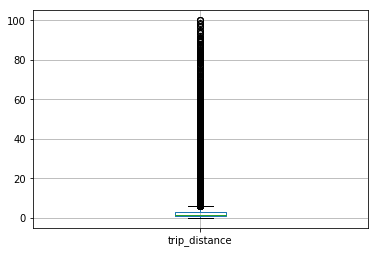

In [27]:
taxi.boxplot(column='trip_distance');

In [28]:
taxi.shape

(14410553, 17)

In [95]:
taxi = taxi[taxi.trip_distance<5]

In [96]:
taxi = taxi[(np.abs(stats.zscore(taxi.trip_distance)) < 3)]

In [31]:
taxi.shape

(12547898, 17)

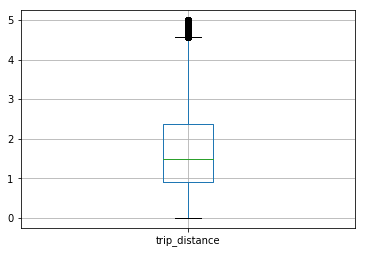

In [32]:
taxi.boxplot(column='trip_distance');

In [33]:
outliers_col(taxi)

trip_distance | 0 | float64
pickup_longitude | 178090 | float64
pickup_latitude | 178099 | float64
dropoff_longitude | 190507 | float64
dropoff_latitude | 190508 | float64
fare_amount | 58366 | float64
surcharge | 369 | float64
mta_tax | 23916 | float64
tip_amount | 60595 | float64
tolls_amount | 34459 | float64
total_amount | 63046 | float64


In [97]:
taxi = taxi[taxi.pickup_longitude!=0.0]
taxi = taxi[taxi.dropoff_longitude!=0.0]
taxi = taxi[taxi.pickup_latitude!=0.0]
taxi = taxi[taxi.dropoff_latitude!=0.0]
taxi.shape

(12350347, 17)

In [35]:
outliers_col(taxi)

trip_distance | 0 | float64
pickup_longitude | 605 | float64
pickup_latitude | 449 | float64
dropoff_longitude | 539 | float64
dropoff_latitude | 446 | float64
fare_amount | 57586 | float64
surcharge | 341 | float64
mta_tax | 16769 | float64
tip_amount | 59502 | float64
tolls_amount | 31685 | float64
total_amount | 66311 | float64


In [98]:
taxi = taxi[(np.abs(stats.zscore(taxi.fare_amount)) < 3)  & \
    (np.abs(stats.zscore(taxi.surcharge)) < 3)]
taxi.shape

(12292423, 17)

In [99]:
taxi = taxi[(np.abs(stats.zscore(taxi.mta_tax)) < 3)  & \
    (np.abs(stats.zscore(taxi.tip_amount)) < 3)]
taxi.shape

(12220891, 17)

In [100]:
taxi = taxi[(np.abs(stats.zscore(taxi.tolls_amount)) < 3)  & \
    (np.abs(stats.zscore(taxi.total_amount)) < 3)]
taxi.shape

(12125606, 17)

In [39]:
outliers_col(taxi)

trip_distance | 17778 | float64
pickup_longitude | 998 | float64
pickup_latitude | 1107 | float64
dropoff_longitude | 369 | float64
dropoff_latitude | 522 | float64
fare_amount | 45866 | float64
surcharge | 0 | float64


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:2281: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


mta_tax | 0 | float64
tip_amount | 44294 | float64
tolls_amount | 276 | float64
total_amount | 28736 | float64


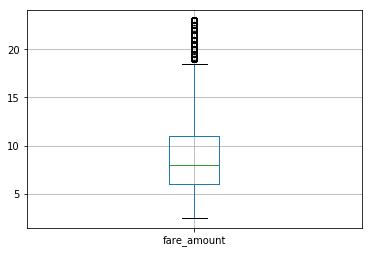

In [40]:
taxi.boxplot(column='fare_amount');

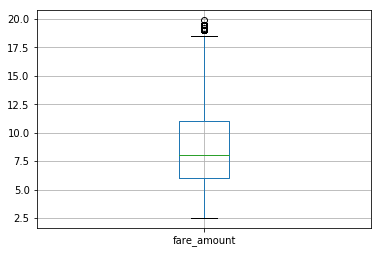

In [101]:
taxi = taxi[taxi.fare_amount<20]
taxi.boxplot(column='fare_amount');

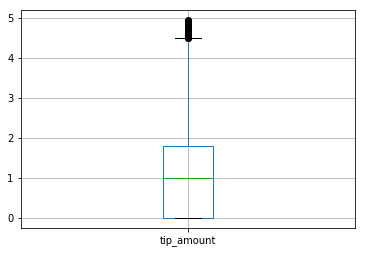

In [42]:
taxi.boxplot(column='tip_amount');

In [43]:
taxi.shape

(12079741, 17)

In [102]:
cash= taxi[(taxi.payment_type == "CSH") & (taxi.tip_amount==0.0)].index
taxi= taxi.drop(cash)

In [103]:
taxi.shape

(6885932, 17)

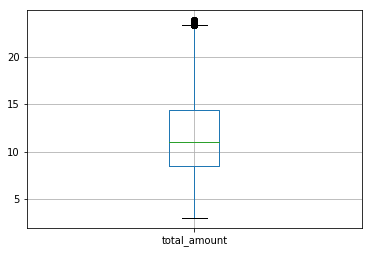

In [46]:
taxi.boxplot(column='total_amount');

In [47]:
taxi.rate_code.value_counts()

1      6885092
5          315
4          231
2          106
0           83
6           58
210         38
3            6
9            2
28           1
Name: rate_code, dtype: int64

In [104]:
taxi = taxi[taxi.rate_code == 1]

In [49]:
taxi.shape

(6885092, 17)

In [50]:
taxi.surcharge.value_counts()

0.00    3449819
0.50    2354011
1.00    1081261
0.01          1
Name: surcharge, dtype: int64

In [105]:
taxi = taxi[taxi.surcharge!=0.01]

## Exploring data types

In [52]:
taxi.dtypes

vendor_id             object
pickup_datetime       object
dropoff_datetime      object
passenger_count        int64
trip_distance        float64
pickup_longitude     float64
pickup_latitude      float64
rate_code              int64
dropoff_longitude    float64
dropoff_latitude     float64
payment_type          object
fare_amount          float64
surcharge            float64
mta_tax              float64
tip_amount           float64
tolls_amount         float64
total_amount         float64
dtype: object

In [106]:
del taxi['rate_code'] ##too imbalanced leaning towards rate code 1

In [54]:
taxi.payment_type.value_counts()

CRD    6793722
UNK      57686
NOC      26253
DIS       7217
CSH        213
Name: payment_type, dtype: int64

In [107]:
taxi[taxi.payment_type== 'CSH'].head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
468098,CMT,2014-01-06 09:05:35,2014-01-06 09:05:35,1,1.0,-73.983940,40.767242,-73.983940,40.767242,CSH,7.5,0.0,0.5,1.0,0.0,9.0
502812,CMT,2014-01-06 20:30:46,2014-01-06 20:33:34,1,0.6,-73.963935,40.808180,-73.968006,40.801141,CSH,4.5,0.5,0.5,2.0,0.0,7.5
511296,CMT,2014-01-06 14:21:26,2014-01-06 14:36:15,1,1.7,-73.975696,40.781825,-73.960393,40.778652,CSH,7.5,0.0,0.5,1.6,0.0,9.6
526178,CMT,2014-01-06 15:21:52,2014-01-06 15:27:11,1,0.4,-73.982257,40.779017,-73.989150,40.777184,CSH,4.0,0.0,0.5,1.0,0.0,5.5
526983,CMT,2014-01-07 08:56:47,2014-01-07 09:16:39,1,1.5,-73.986784,40.739425,-74.006001,40.739433,CSH,12.0,0.0,0.5,1.0,0.0,13.5


In [108]:
for col in ['vendor_id', 'payment_type']:
    taxi[col] = taxi[col].astype('category')

In [109]:
taxi['pickup_datetime'] =  pd.to_datetime(taxi['pickup_datetime'], format='%Y-%m-%d %H:%M:%S.%f')

In [110]:
taxi['dropoff_datetime']= pd.to_datetime(taxi['dropoff_datetime'], format='%Y-%m-%d %H:%M:%S.%f')

In [59]:
taxi.dtypes

vendor_id                  category
pickup_datetime      datetime64[ns]
dropoff_datetime     datetime64[ns]
passenger_count               int64
trip_distance               float64
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
payment_type               category
fare_amount                 float64
surcharge                   float64
mta_tax                     float64
tip_amount                  float64
tolls_amount                float64
total_amount                float64
dtype: object

In [111]:
taxi["duration"]= taxi.dropoff_datetime - taxi.pickup_datetime
taxi.duration= taxi.duration.apply(lambda x: x.seconds)

In [61]:
taxi.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,duration
0,CMT,2014-01-09 20:45:25,2014-01-09 20:52:31,1,0.7,-73.994770,40.736828,-73.982227,40.731790,CRD,6.5,0.5,0.5,1.40,0.0,8.90,426
1,CMT,2014-01-09 20:46:12,2014-01-09 20:55:12,1,1.4,-73.982392,40.773382,-73.960449,40.763995,CRD,8.5,0.5,0.5,1.90,0.0,11.40,540
2,CMT,2014-01-09 20:44:47,2014-01-09 20:59:46,2,2.3,-73.988570,40.739406,-73.986626,40.765217,CRD,11.5,0.5,0.5,1.50,0.0,14.00,899
3,CMT,2014-01-09 20:44:57,2014-01-09 20:51:40,1,1.7,-73.960213,40.770464,-73.979863,40.777050,CRD,7.5,0.5,0.5,1.70,0.0,10.20,403
4,CMT,2014-01-09 20:47:09,2014-01-09 20:53:32,1,0.9,-73.995371,40.717248,-73.984367,40.720524,CRD,6.0,0.5,0.5,1.75,0.0,8.75,383


## Variable Grouping for Datetimes

In [112]:
taxi.shape

(6885091, 17)

In [113]:
taxi["time_of_day"]= taxi.pickup_datetime.apply(lambda x: x.hour)

In [77]:
taxi[taxi.duration >=3600].shape

(833, 19)

In [76]:
taxi.shape

(6885091, 19)

The ones that are longer than an hour are so insignificant so its fair to assume that pickup time of day will be the same as dropoff

In [115]:
taxi.head(10)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,duration,time_of_day
0,CMT,2014-01-09 20:45:25,2014-01-09 20:52:31,1,0.7,-73.994770,40.736828,-73.982227,40.731790,CRD,6.5,0.5,0.5,1.40,0.0,8.90,426,20
1,CMT,2014-01-09 20:46:12,2014-01-09 20:55:12,1,1.4,-73.982392,40.773382,-73.960449,40.763995,CRD,8.5,0.5,0.5,1.90,0.0,11.40,540,20
2,CMT,2014-01-09 20:44:47,2014-01-09 20:59:46,2,2.3,-73.988570,40.739406,-73.986626,40.765217,CRD,11.5,0.5,0.5,1.50,0.0,14.00,899,20
3,CMT,2014-01-09 20:44:57,2014-01-09 20:51:40,1,1.7,-73.960213,40.770464,-73.979863,40.777050,CRD,7.5,0.5,0.5,1.70,0.0,10.20,403,20
4,CMT,2014-01-09 20:47:09,2014-01-09 20:53:32,1,0.9,-73.995371,40.717248,-73.984367,40.720524,CRD,6.0,0.5,0.5,1.75,0.0,8.75,383,20
5,CMT,2014-01-09 20:45:07,2014-01-09 20:51:01,1,0.9,-73.983811,40.749655,-73.989747,40.756575,CRD,6.0,0.5,0.5,1.40,0.0,8.40,354,20
7,CMT,2014-01-09 20:43:23,2014-01-09 20:52:07,1,2.1,-73.979906,40.745850,-73.959090,40.773639,CRD,9.0,0.5,0.5,2.00,0.0,12.00,524,20
8,CMT,2014-01-09 20:43:04,2014-01-09 20:54:29,1,3.4,-73.981147,40.758918,-73.942510,40.785975,CRD,12.0,0.5,0.5,2.60,0.0,15.60,685,20
9,CMT,2014-01-09 20:50:23,2014-01-09 20:58:10,1,2.3,-73.955193,40.765468,-73.979023,40.740578,CRD,9.0,0.5,0.5,1.00,0.0,11.00,467,20
11,CMT,2014-01-09 20:48:04,2014-01-09 21:01:37,1,3.3,-73.991782,40.748911,-73.988359,40.714205,CRD,12.5,0.5,0.5,4.05,0.0,17.55,813,20


In [116]:
b = [0,4,8,12,16,20,24]
l = ['Late Night', 'Early Morning','Morning','Noon','Eve','Night']

In [117]:
taxi["time_of_day"] = pd.cut(taxi["time_of_day"], bins=b, labels=l)

In [118]:
taxi.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,duration,time_of_day
0,CMT,2014-01-09 20:45:25,2014-01-09 20:52:31,1,0.7,-73.994770,40.736828,-73.982227,40.731790,CRD,6.5,0.5,0.5,1.40,0.0,8.90,426,Eve
1,CMT,2014-01-09 20:46:12,2014-01-09 20:55:12,1,1.4,-73.982392,40.773382,-73.960449,40.763995,CRD,8.5,0.5,0.5,1.90,0.0,11.40,540,Eve
2,CMT,2014-01-09 20:44:47,2014-01-09 20:59:46,2,2.3,-73.988570,40.739406,-73.986626,40.765217,CRD,11.5,0.5,0.5,1.50,0.0,14.00,899,Eve
3,CMT,2014-01-09 20:44:57,2014-01-09 20:51:40,1,1.7,-73.960213,40.770464,-73.979863,40.777050,CRD,7.5,0.5,0.5,1.70,0.0,10.20,403,Eve
4,CMT,2014-01-09 20:47:09,2014-01-09 20:53:32,1,0.9,-73.995371,40.717248,-73.984367,40.720524,CRD,6.0,0.5,0.5,1.75,0.0,8.75,383,Eve


In [122]:
taxi.time_of_day.value_counts()

Eve              1710424
Morning          1285135
Noon             1226875
Night            1135662
Early Morning     813478
Late Night        464577
Name: time_of_day, dtype: int64

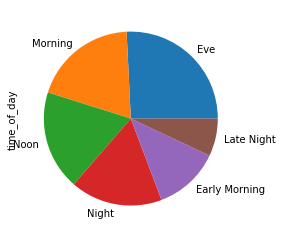

In [123]:
taxi.time_of_day.value_counts().plot.pie();

In [168]:
def time_to_numeric(x):
    if x=='Late Night':
        return 6
    if x=='Early Morning':
        return 1
    if x=='Morning':
        return 2
    if x=='Noon':
        return 3
    if x=='Eve':
        return 4
    if x=='Night':
        return 5

In [169]:
taxi["time_of_day"] = taxi["time_of_day"].apply(time_to_numeric)

In [170]:
taxi[["pickup_datetime", "time_of_day"]].head(20)

,pickup_datetime,time_of_day
0,2014-01-09 20:45:25,4
1,2014-01-09 20:46:12,4
2,2014-01-09 20:44:47,4
3,2014-01-09 20:44:57,4
4,2014-01-09 20:47:09,4
5,2014-01-09 20:45:07,4
7,2014-01-09 20:43:23,4
8,2014-01-09 20:43:04,4
9,2014-01-09 20:50:23,4
11,2014-01-09 20:48:04,4


In [176]:
taxi.groupby("time_of_day").size()

time_of_day
6     464577
1     813478
2    1285135
3    1226875
4    1710424
5    1135662
dtype: int64

In [178]:
taxi.time_of_day.to_numeric()

AttributeError: 'Series' object has no attribute 'to_numeric'

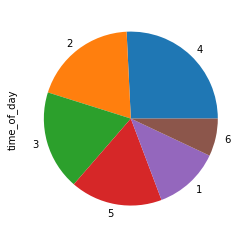

In [171]:
taxi.time_of_day.value_counts().plot.pie();

## Preliminary data visualization

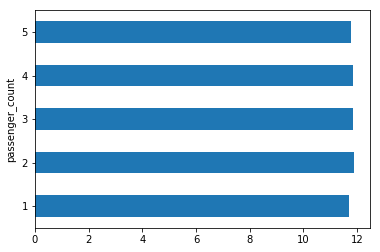

In [62]:
ttlamount_by_passenger = taxi.groupby("passenger_count")["total_amount"].mean()
ttlamount_by_passenger.head()
ttlamount_by_passenger.head(10).plot.barh();

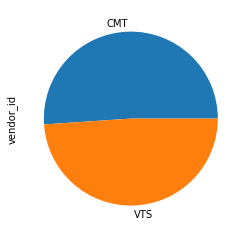

In [63]:
taxi.vendor_id.value_counts().plot.pie();

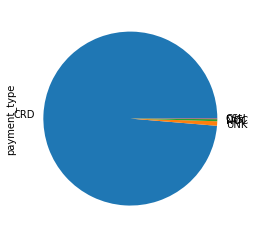

In [64]:
taxi.payment_type.value_counts().plot.pie(); #imbalanced

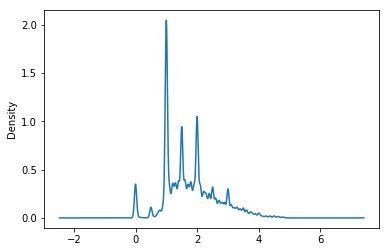

In [65]:
taxi.tip_amount.plot.kde();

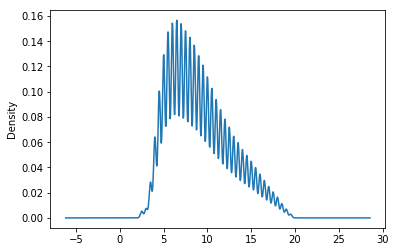

In [66]:
taxi.fare_amount.plot.kde();

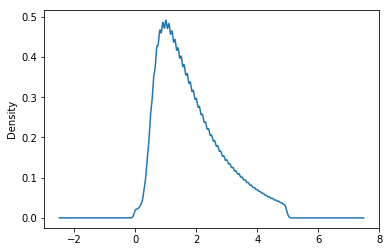

In [67]:
taxi.trip_distance.plot.kde();

In [68]:
tip_by_pass = taxi.groupby("passenger_count")["tip_amount"].mean()
tip_by_pass.head()

passenger_count
1    1.777360
2    1.801393
3    1.788876
4    1.790012
5    1.754257
Name: tip_amount, dtype: float64

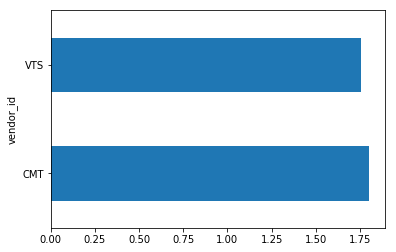

In [69]:
tip_by_vend = taxi.groupby("vendor_id")["tip_amount"].mean()
tip_by_vend.head()
tip_by_vend.head().plot.barh();

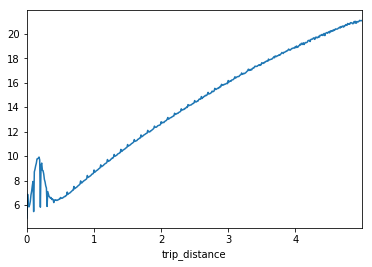

In [70]:
taxi.groupby("trip_distance").total_amount.mean().plot.line();

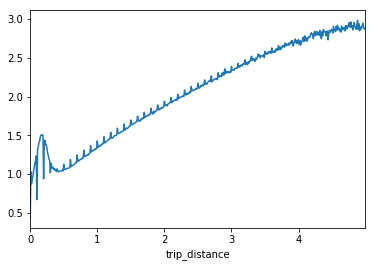

In [71]:
taxi.groupby("trip_distance").tip_amount.mean().plot.line();

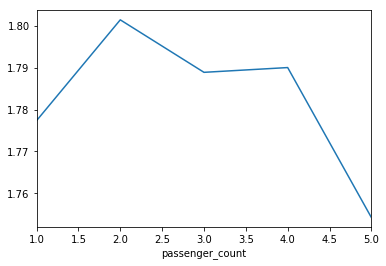

In [72]:
taxi.groupby("passenger_count").tip_amount.mean().plot.line();

In [73]:
five_payments= taxi.payment_type.unique()


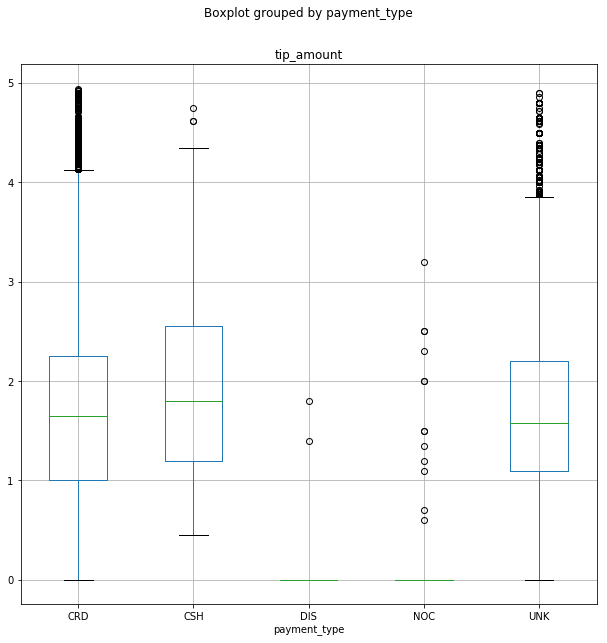

In [74]:
taxi[taxi.payment_type.isin(five_payments)].boxplot(column="tip_amount", by="payment_type", figsize=(10,10));

In [133]:
taxi.dtypes

vendor_id                  category
pickup_datetime      datetime64[ns]
dropoff_datetime     datetime64[ns]
passenger_count               int64
trip_distance               float64
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
payment_type               category
fare_amount                 float64
surcharge                   float64
mta_tax                     float64
tip_amount                  float64
tolls_amount                float64
total_amount                float64
duration                      int64
time_of_day                category
dtype: object

In [138]:
from ipywidgets import interact
numerical_columns = taxi.select_dtypes([int, float]).columns.tolist()
numerical_columns

['trip_distance',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'fare_amount',
 'surcharge',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'total_amount']

In [159]:
nc= taxi.columns
nc

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'surcharge', 'mta_tax', 'tip_amount', 'tolls_amount', 'total_amount',
       'duration', 'time_of_day'],
      dtype='object')

In [160]:
numerical_columns= nc.drop([nc[0],nc[1],nc[2],nc[5],nc[6],nc[7],nc[8],nc[9],nc[13],nc[17]])

In [161]:
numerical_columns

Index(['passenger_count', 'trip_distance', 'fare_amount', 'surcharge',
       'mta_tax', 'tolls_amount', 'total_amount', 'duration'],
      dtype='object')

In [162]:
@interact(col1=numerical_columns)
def dynamic_chart(col1):
    taxi.groupby(col1).tip_amount.mean().plot.line()
    plt.title("{} vs tip_amount".format(col1))
    plt.xlabel(col1)
    plt.ylabel("Tipping Amount in $US");

interactive(children=(Dropdown(description='col1', options=('passenger_count', 'trip_distance', 'fare_amount',…

## Export the cleaned dataset

In [124]:
taxi.shape #check its the right size

(6885091, 18)

In [172]:
taxi.to_csv("data/taxi_cleaned.csv", index=False)

ignore this.


ndf = taxi14['pickup_datetime'].str.split(' ',expand=True).rename(columns={0:"pickup_date", 1:'pickup_time'})
taxi14 = pd.concat([taxi14,ndf],1)
taxi14 = taxi14.drop(['pickup_datetime'],1)

ndf = taxi14['dropoff_datetime'].str.split(' ',expand=True).rename(columns={0:"dropoff_date", 1:'dropoff_time'})
taxi14 = pd.concat([taxi14,ndf],1)
taxi14 = taxi14.drop(['dropoff_datetime'],1) ##

#split the date and time on the space abd delete the original columns